# Librerías Importadas

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Codificación Binaria de Mike

Config decodificada (reflejo, rotación, posición):
I -> reflejar: 0 rot: 0 pos: 61
F -> reflejar: 0 rot: 2 pos: 28
L -> reflejar: 0 rot: 1 pos: 51
N -> reflejar: 1 rot: 0 pos: 28
P -> reflejar: 1 rot: 2 pos: 26
T -> reflejar: 1 rot: 1 pos: 58
U -> reflejar: 1 rot: 0 pos: 42
V -> reflejar: 1 rot: 0 pos: 11
W -> reflejar: 1 rot: 3 pos: 63
X -> reflejar: 1 rot: 0 pos: 54
Y -> reflejar: 1 rot: 3 pos: 9
Z -> reflejar: 1 rot: 3 pos: 0

Tablero asociado:


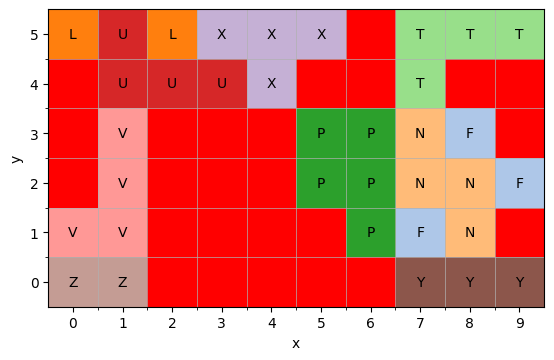

In [ ]:
# ==========================================================
#  CODIFICACIÓN 1
# ==========================================================

# CADA PIEZA LA VOY A REPRESENTAR COMO UN NÚMERO BINARIO CON 9 BITS:
#  - 1 BIT PARA SABER SI SE REFLEJA O NO (2 POSIBIIDADES)
#  - 2 BITS PARA SABER LA ROTACIÓN QUE SE HACE
#  - 6 BITS PARA LA POSICIÓN DE REFERENCIA SOBRE EL TABLERO (64 POSIBILIDADES). LOS NÚMEROS 60, 61, 62 Y 63 ESTÁN SIN ASIGNAR, SIGNIFICAN 'NO COLOCO LA PIEZA'.

# LA CODIFICACION DE UNA SOLUCIÓN VA A SER LA CONCATENACIÓN DE LAS CODIFICACIONES DE LAS 12 PIEZAS, ES DECIR 12x9=108 BITS.

# ==========================================================
#  DEFINICIÓN DE FIGURAS COMO CLASE
# ==========================================================

class Figura:
    def __init__(self, nombre, puntos_relativos):
        """
        nombre: string identificador de la figura (p. ej. 'I', 'F', ...)
        puntos_relativos: lista de tuplas (dx, dy) relativas a un punto de referencia
        """
        self.nombre = nombre
        self.puntos_relativos = puntos_relativos

    def puntos_absolutos(self, pos_ref):
        """
        Devuelve la lista de puntos absolutos a partir de una posición de referencia.
        pos_ref: (x0, y0)
        """
        x0, y0 = pos_ref
        return [(x0 + dx, y0 + dy) for (dx, dy) in self.puntos_relativos]

    def rotar_90(self):
        """Devuelve una nueva Figura rotada 90°."""
        nuevos = [(-y, x) for (x, y) in self.puntos_relativos]
        return Figura(self.nombre + "_R90", nuevos)

    def rotar_180(self):
        """Devuelve una nueva Figura rotada 180°."""
        nuevos = [(-x, -y) for (x, y) in self.puntos_relativos]
        return Figura(self.nombre + "_R180", nuevos)

    def rotar_270(self):
        """Devuelve una nueva Figura rotada 270°."""
        nuevos = [(y, -x) for (x, y) in self.puntos_relativos]
        return Figura(self.nombre + "_R270", nuevos)

    def reflejar(self):
        """Devuelve una nueva Figura reflejada en eje vertical."""
        nuevos = [(-x, y) for (x, y) in self.puntos_relativos]
        return Figura(self.nombre + "_REF", nuevos)

# ==========================================================
#  DEFINICIÓN DEL PLANO COMO CLASE
# ==========================================================

class Plano2D:
    def __init__(self, width=10, height=6, fondo="."):
        """
        width: ancho del plano
        height: alto del plano
        fondo: carácter de fondo
        """
        self.width = width
        self.height = height
        self.fondo = fondo
        self._crear_plano()

    def _crear_plano(self):
        """Inicializa el plano vacío."""
        self.plane = [[self.fondo for _ in range(self.width)]
                      for _ in range(self.height)]

    def limpiar(self):
        """Limpia el plano."""
        self._crear_plano()

    def pintar_figura(self, figura, pos_ref, char="#", origin="@"):
        """
        Pinta una figura en el plano.
        figura: instancia de Figura
        pos_ref: (x, y) posición de referencia
        char: carácter con el que se dibuja la figura
        """
        puntos = figura.puntos_absolutos(pos_ref)

        i = 0
        for (x, y) in puntos:
            if i == 0 and 0 <= x < self.width and 0 <= y < self.height:
                # Convertir y-cartesiano → índice de matriz
                row = (self.height - 1) - y
                col = x
                self.plane[row][col] = origin
            elif 0 <= x < self.width and 0 <= y < self.height:
                # Convertir y-cartesiano → índice de matriz
                row = (self.height - 1) - y
                col = x
                self.plane[row][col] = char
            i+=1

        return puntos  # por si quieres usarlos

    def mostrar(self):
        """Imprime el plano en consola."""
        for row in self.plane:
            print(" ".join(row))


# ==========================================================
#  DEFINICIÓN DE TODAS LAS FIGURAS
# ==========================================================

I = Figura("I", [(0, 0), (0, 1), (0, 2), (0, -1), (0, -2)])
F = Figura("F", [(0, 0), (0, 1), (1, 1), (-1, 0), (0, -1)])
L = Figura("L", [(0, 0), (0, 1), (0, 2), (0, -1), (1, -1)])
N = Figura("N", [(0, 0), (1, 0), (1, 1), (0, -1), (0, -2)])
P = Figura("P", [(0, 0), (0, 1), (-1, 0), (-1, -1), (0, -1)])
T = Figura("T", [(0, 0), (0, 1), (-1, 1), (1, 1), (0, -1)])
U = Figura("U", [(0, 0), (-1, 0), (-1, 1), (1, 0), (1, 1)])
V = Figura("V", [(0, 0), (0, 1), (0, 2), (1, 0), (2, 0)])
W = Figura("W", [(0, 0), (-1, 0), (-1, 1), (0, -1), (1, -1)])
X = Figura("X", [(0, 0), (0, 1), (-1, 0), (1, 0), (0, -1)])
Y = Figura("Y", [(0, 0), (0, 1), (-1, 0), (0, -1), (0, -2)])
Z = Figura("Z", [(0, 0), (0, 1), (-1, 1), (0, -1), (1, -1)])

figuras = [I, F, L, N, P, T, U, V, W, X, Y, Z]
index = {"I": 0, "F": 1, "L": 2, "N": 3, "P": 4, "T": 5, "U": 6, "V": 7, "W": 8, "X": 9, "Y": 10, "Z": 11}

# Orden fijo de piezas (misma que 'figuras')
PIECE_ORDER = ["I", "F", "L", "N", "P", "T", "U", "V", "W", "X", "Y", "Z"]
nombre_a_figura = {f.nombre: f for f in figuras}

# ==========================================================
#  DEFINICIÓN DE LA LONGITUD GENOMA
# ==========================================================

LONGITUD_GENOMA = 108

# ==========================================================
#  DEFINICIÓN DE DICCIONARIOS DE CODIFICACIÓN
# ==========================================================

# MEDIDAS DEL TABLERO
ancho = 10  # eje x: 0...9
alto = 6    # eje y: 0...5

# CODIFICACIÓN ROTACIONES
codificacion_rotaciones = {0: "No", 1: "90", 2: "180", 3: "270"}

# CODIFICACIÓN REFLEJO
codificacion_reflejar = {0: "No", 1: "Sí"}

# CODIFICACIÓN DE POSICIONES DEL TABLERO
codificacion_puntos = {
    y * ancho + x: (x, y)
    for y in range(alto)
    for x in range(ancho)
}

# ==========================================================
#  HERRAMIENTAS DE BITS
# ==========================================================

def int_a_bits(n, num_bits):
    """Convierte int -> string binaria con padding a num_bits."""
    return format(n, f"0{num_bits}b")

def bits_a_int(bits):
    """Convierte string binaria -> int."""
    return int(bits, 2)

# ==========================================================
#  CODIFICAR / DESCODIFICAR UNA SOLUCIÓN
# ==========================================================

def codificar_solucion(config):
    """
    config: lista de 12 tuplas (reflejar, rot, pos)
        - reflejar: 0 o 1
        - rot: 0,1,2,3   (0=sin rot, 1=90, 2=180, 3=270)
        - pos: 0..63     (0..59 -> celda, 60..63 -> no colocar)
    Devuelve string binaria de longitud 108.
    """
    bits = []
    for reflejar, rot, pos in config:
        bits.append(int_a_bits(reflejar, 1))
        bits.append(int_a_bits(rot, 2))
        bits.append(int_a_bits(pos, 6))
    return "".join(bits)

def descodificar_solucion(bits):
    """
    bits: string binaria de longitud 108.
    Devuelve lista de 12 tuplas (reflejar, rot, pos).
    """
    assert len(bits) == 108
    config = []
    for i in range(12):
        fragmento = bits[i*9:(i+1)*9]
        reflejar = bits_a_int(fragmento[0])      # 1 bit
        rot = bits_a_int(fragmento[1:3])         # 2 bits
        pos = bits_a_int(fragmento[3:9])         # 6 bits
        config.append((reflejar, rot, pos))
    return config

# ==========================================================
#  APLICAR TRANSFORMACIONES A UNA FIGURA
# ==========================================================

def transformar_figura(figura, reflejar, rot):
    """
    figura: instancia de Figura
    reflejar: 0 o 1
    rot: 0,1,2,3 (0 = sin rotación)
    Devuelve una nueva Figura transformada.
    """
    f = figura
    if reflejar == 1:
        f = f.reflejar()
    if rot == 1:
        f = f.rotar_90()
    elif rot == 2:
        f = f.rotar_180()
    elif rot == 3:
        f = f.rotar_270()
    return f

# ==========================================================
#  FUNCIÓN DE APTITUD
# ==========================================================

def evaluar_aptitud(bits):
    """
    Calcula la aptitud de una solución codificada (string binaria).
    Criterio:
      - + puntos por celdas cubiertas únicas.
      - penalización por solapamientos, piezas fuera del tablero y piezas no colocadas.
    """
    config = descodificar_solucion(bits)

    ocupadas = set()   # índices de celdas 0..59
    solapamientos = 0
    fuera = 0
    no_colocadas = 0

    for idx_pieza, (reflejar, rot, pos) in enumerate(config):
        # Piezas no colocadas
        if pos >= 60:
            no_colocadas += 1
            continue

        # Obtener figura base según el orden fijado
        nombre = PIECE_ORDER[idx_pieza]
        figura_base = nombre_a_figura[nombre]

        # Posición de referencia en el tablero
        x_ref, y_ref = codificacion_puntos[pos]

        # Aplicar transformaciones
        figura_trans = transformar_figura(figura_base, reflejar, rot)

        for dx, dy in figura_trans.puntos_relativos:
            x = x_ref + dx
            y = y_ref + dy

            # Comprobar tablero
            if not (0 <= x < ancho and 0 <= y < alto):
                fuera += 1
                continue

            idx_celda = y * ancho + x
            if idx_celda in ocupadas:
                solapamientos += 1
            else:
                ocupadas.add(idx_celda)

    cobertura = len(ocupadas)

    # OPCIÓN 1:
    # Diseña la función de aptitud (ajustable)
    penalizacion = 1000 * solapamientos + 1000 * fuera + 1000 * no_colocadas

    # Peso a cobertura para favorecer llenar el tablero
    aptitud = cobertura * 1000 - penalizacion

    # OPCIÓN 2:
    # if fuera == 0 and solapamientos == 0:
    #   penalizacion = 100 * no_colocadas
    #   aptitud = cobertura * 500
    # else:
    #   aptitud = -1000

    return aptitud

# ==============================================================
#  FUNCIONES AUXILIARES PARA MOSTRAR UNA SOLUCIÓN EN EL TABLERO
# ==============================================================

def mostrar_solucion(bits):
    """
    Dibuja la mejor solución en un Plano2D usando tus clases.
    """
    plano = Plano2D(width=ancho, height=alto)
    config = descodificar_solucion(bits)

    for idx_pieza, (reflejar, rot, pos) in enumerate(config):
        if pos >= 60:
            continue  # no colocar

        nombre = PIECE_ORDER[idx_pieza]
        figura_base = nombre_a_figura[nombre]
        figura_trans = transformar_figura(figura_base, reflejar, rot)
        x_ref, y_ref = codificacion_puntos[pos]

        # Pinto cada pieza con un carácter distinto (por ejemplo su nombre)
        plano.pintar_figura(figura_trans, (x_ref, y_ref), char=nombre[0])

    plano.mostrar()

def tablero_desde_bits(bits):
    """
    Devuelve una matriz alto×ancho con índices de pieza
    a partir de una solución codificada.
      -1 = vacío
       0..11 = índice en PIECE_ORDER
    """
    config = descodificar_solucion(bits)
    # matriz[y][x]
    matriz = [[-1 for _ in range(ancho)] for _ in range(alto)]

    for idx_pieza, (reflejar, rot, pos) in enumerate(config):
        if pos >= 60:
            continue  # pieza no colocada

        nombre = PIECE_ORDER[idx_pieza]
        figura_base = nombre_a_figura[nombre]
        figura_trans = transformar_figura(figura_base, reflejar, rot)

        x_ref, y_ref = codificacion_puntos[pos]

        for dx, dy in figura_trans.puntos_relativos:
            x = x_ref + dx
            y = y_ref + dy
            if 0 <= x < ancho and 0 <= y < alto:
                # si hay solapamiento, podrías marcarlo de otra forma
                matriz[y][x] = idx_pieza

    return matriz


def mostrar_solucion_matplotlib(bits):
    matriz = tablero_desde_bits(bits)

    cmap_base = plt.cm.tab20  # 20 colores variados
    colores = ["red"] + [cmap_base(i) for i in range(12)]
    cmap = mcolors.ListedColormap(colores)

    fig, ax = plt.subplots()

    # Pintamos la matriz. origin='lower' hace que (0,0) esté abajo a la izquierda
    im = ax.imshow(matriz, origin='lower', interpolation='none', cmap=cmap)

    # Ticks de ejes en las coordenadas de casillas
    ax.set_xticks(range(ancho))
    ax.set_yticks(range(alto))
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # Dibujar rejilla de las casillas
    ax.set_xticks([x - 0.5 for x in range(1, ancho)], minor=True)
    ax.set_yticks([y - 0.5 for y in range(1, alto)], minor=True)
    ax.grid(which="minor", linestyle="-", linewidth=0.5)
    ax.set_xlim(-0.5, ancho - 0.5)
    ax.set_ylim(-0.5, alto - 0.5)
    ax.set_aspect("equal")

    # Escribir la letra de la pieza en cada celda ocupada
    for y in range(alto):
        for x in range(ancho):
            idx_pieza = matriz[y][x]
            if idx_pieza != -1:
                letra = PIECE_ORDER[idx_pieza]  # "I","F",...
                ax.text(
                    x, y,
                    letra,
                    ha="center", va="center"
                )

    plt.show()

# ==========================================================
#  CÓDIGO EJEMPLO PARA MOSTRAR UNA SOLUCIÓN CANDIDATA
# ==========================================================

def individuo_aleatorio():
    """Devuelve un string binario de longitud 108."""
    return "".join(random.choice("01") for _ in range(LONGITUD_GENOMA))

bits = individuo_aleatorio()
config = descodificar_solucion(bits)
print("Config decodificada (reflejo, rotación, posición):")
for nombre, (ref, rot, pos) in zip(PIECE_ORDER, config):
    print(nombre, "-> reflejar:", ref, "rot:", rot, "pos:", pos)

print("\nTablero asociado:")
# mostrar_solucion(bits)
mostrar_solucion_matplotlib(bits)

# Algoritmo Genético (Arantxa)

In [ ]:
# Las variables globales como LONGITUD_GENOMA (48) se asumen definidas
# en la sección de configuración del código.

# ==========================================================
#  OPERADORES GENÉTICOS
# ==========================================================

def individuo_aleatorio():
    """Genera un cromosoma binario aleatorio de LONGITUD_GENOMA (48 bits)."""
    return "".join(random.choice("01") for _ in range(LONGITUD_GENOMA))

def mutar(bits, p_mut=0.05):
    """Mutación por flip de bit con probabilidad p_mut."""
    lista = list(bits)
    for i in range(len(lista)):
        if random.random() < p_mut:
            # Invierte el bit
            lista[i] = "1" if lista[i] == "0" else "0"
    return "".join(lista)

def cruzar_multipunto(p1, p2, p_cruce=0.9, k=5):
    """
    Cruce multipunto (k=5) para intercambiar segmentos.
    p1, p2 son los cromosomas (strings binarios).
    """
    if random.random() > p_cruce:
        return p1, p2  # Sin cruce

    # Genera k puntos de corte aleatorios
    puntos = sorted(random.sample(range(1, LONGITUD_GENOMA), k))
    puntos.append(LONGITUD_GENOMA)

    h1, h2 = [], []
    last = 0
    swap = False # Determina si tomamos el segmento de P1 o P2

    for p in puntos:
        segmento1 = p1[last:p]
        segmento2 = p2[last:p]

        if not swap:
            # Segmentos 1, 3, 5, ...
            h1.append(segmento1)
            h2.append(segmento2)
        else:
            # Segmentos 2, 4, 6, ... (intercambiados)
            h1.append(segmento2)
            h2.append(segmento1)

        swap = not swap
        last = p

    return "".join(h1), "".join(h2)

def cruzar(p1, p2, p_cruce=0.9):
    """Alias de cruce multipunto con k=5."""
    return cruzar_multipunto(p1, p2, p_cruce=p_cruce, k=5)

def seleccion_torneo(poblacion, aptitudes, k=3):
    """Selección por torneo de tamaño k: elige al individuo más apto de k elegidos al azar."""
    mejores_idx = None
    mejor_fit = float("-inf")

    for _ in range(k):
        i = random.randrange(len(poblacion))
        if aptitudes[i] > mejor_fit:
            mejor_fit = aptitudes[i]
            mejores_idx = i

    return poblacion[mejores_idx]


# ==========================================================
#  FUNCIÓN PRINCIPAL DEL ALGORITMO GENÉTICO
# ==========================================================

def algoritmo_genetico(
    tam_poblacion=300,
    generaciones=200,
    p_cruce=0.9,
    p_mut=0.05,
    elitismo=True,
    verbose=1,
    evaluar_aptitud_func=None, # Se asume que esta función se pasa o está definida globalmente
    reparar_individuo_func=None
):
    """Ejecuta el ciclo de evolución del AG."""

    # Usamos las funciones pasadas o definidas globalmente
    evaluar_aptitud = evaluar_aptitud_func
    reparar_individuo = reparar_individuo_func

    # 1. Inicializar población
    poblacion = [reparar_individuo(individuo_aleatorio())
                 for _ in range(tam_poblacion)]

    history = []
    mejor_global = None
    mejor_fit_global = float("-inf")

    for gen in range(generaciones):
        # 2. Evaluación
        aptitudes = [evaluar_aptitud(ind) for ind in poblacion]

        # Actualizar mejor global
        for ind, fit in zip(poblacion, aptitudes):
            if fit > mejor_fit_global:
                mejor_fit_global = fit
                mejor_global = ind

        if verbose == 1:
          print(f"Generación {gen}, mejor aptitud: {mejor_fit_global}")

        history.append(mejor_fit_global)

        nueva_poblacion = []

        # 6. Elitismo
        if elitismo and mejor_global is not None:
            nueva_poblacion.append(mejor_global)

        # Rellenar el resto de la población
        while len(nueva_poblacion) < tam_poblacion:
            # 3. Selección
            p1 = seleccion_torneo(poblacion, aptitudes)
            p2 = seleccion_torneo(poblacion, aptitudes)

            # 4. Cruce
            h1, h2 = cruzar(p1, p2, p_cruce)

            # 5. Mutación
            h1 = mutar(h1, p_mut)
            h2 = mutar(h2, p_mut)

            # Reparación (En la 4ª codificación, es de identidad)
            h1 = reparar_individuo(h1)
            h2 = reparar_individuo(h2)

            nueva_poblacion.append(h1)
            if len(nueva_poblacion) < tam_poblacion:
                nueva_poblacion.append(h2)

        poblacion = nueva_poblacion

    return mejor_global, mejor_fit_global, history

In [ ]:
def reparar_individuo(bits):
    """Reparador de identidad para la Codificación 1 (no es estrictamente necesario)."""
    return bits

def mostrar_config_legible(bits):
    config = descodificar_solucion(bits)
    print("Config decodificada (Reflejo, Rotación, Posición):")
    for nombre, (ref, rot, pos) in zip(PIECE_ORDER, config):
        pos_coord = codificacion_puntos.get(pos, "No Colocado")
        print(f"  - {nombre}: Ref={ref}, Rot={rot*90}°, Pos_Idx={pos} -> Coords={pos_coord}")

def plot_history(history):
    generaciones = list(range(len(history)))
    plt.figure()
    plt.plot(generaciones, history)
    plt.xlabel("Generación"); plt.ylabel("Mejor aptitud")
    plt.title("Evolución del mejor fitness global por generación")
    plt.grid(True); plt.tight_layout(); plt.show()

--- Iniciando Algoritmo Genético ---
Generación 0, mejor aptitud: 34000
Generación 1, mejor aptitud: 34000
Generación 2, mejor aptitud: 34000
Generación 3, mejor aptitud: 34000
Generación 4, mejor aptitud: 34000
Generación 5, mejor aptitud: 34000
Generación 6, mejor aptitud: 34000
Generación 7, mejor aptitud: 34000
Generación 8, mejor aptitud: 34000
Generación 9, mejor aptitud: 34000
Generación 10, mejor aptitud: 34000
Generación 11, mejor aptitud: 34000
Generación 12, mejor aptitud: 34000
Generación 13, mejor aptitud: 34000
Generación 14, mejor aptitud: 34000
Generación 15, mejor aptitud: 34000
Generación 16, mejor aptitud: 34000
Generación 17, mejor aptitud: 34000
Generación 18, mejor aptitud: 34000
Generación 19, mejor aptitud: 34000
Generación 20, mejor aptitud: 34000
Generación 21, mejor aptitud: 34000
Generación 22, mejor aptitud: 34000
Generación 23, mejor aptitud: 34000
Generación 24, mejor aptitud: 34000
Generación 25, mejor aptitud: 34000
Generación 26, mejor aptitud: 34000
G

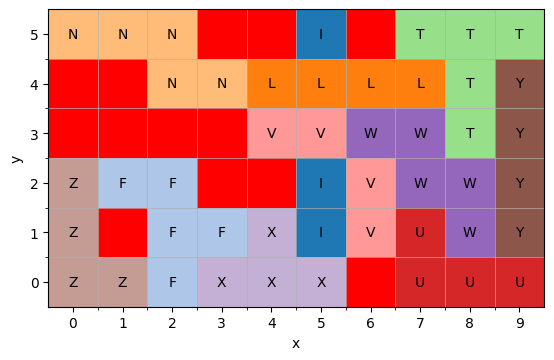


--- Historial de Aptitud ---


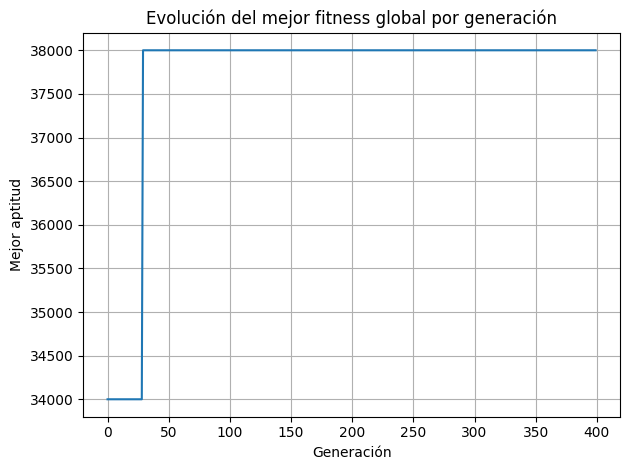

In [ ]:
# ==========================================================
#  EJECUCIÓN DEL AG
# ==========================================================

print("--- Iniciando Algoritmo Genético ---")

# Parámetros ajustados para una mejor convergencia:
TAM_POBLACION = 300   # Un buen tamaño de población para diversidad
GENERACIONES = 400    # Aumentamos las generaciones para dar tiempo a optimizar
P_CRUCE = 0.9
P_MUT = 0.05          # Una mutación relativamente alta ayuda a explorar
ELITISMO = True

# Ejecutar el algoritmo, pasando las funciones de evaluación y reparación.
mejor_bits, mejor_fit, history = algoritmo_genetico(
    tam_poblacion=TAM_POBLACION,
    generaciones=GENERACIONES,
    p_cruce=P_CRUCE,
    p_mut=P_MUT,
    elitismo=ELITISMO,
    verbose=1,
    evaluar_aptitud_func=evaluar_aptitud,
    reparar_individuo_func=reparar_individuo # Función de identidad para la 4ª codificación
)

# ==========================================================
#  ANÁLISIS DE RESULTADOS
# ==========================================================

print("-" * 60)
print(f"✅ FINALIZADO. Mejor aptitud: {mejor_fit}")
print(f"Genoma (48 bits): {mejor_bits}")

if mejor_fit >= 10660:
    print("\n¡SOLUCIÓN PERFECTA ENCONTRADA! (12 piezas, 60 celdas cubiertas)")
else:
    print("\nSolución Óptima Local encontrada.")


print("\n--- Configuración Decodificada ---")
mostrar_config_legible(mejor_bits)

print("\n--- Tablero Asociado ---")
mostrar_solucion_matplotlib(mejor_bits) #

print("\n--- Historial de Aptitud ---")
plot_history(history) #

# Algoritmo Genético (Julia)

## Población / Funciones que afectan al individuo

In [ ]:
def bits_a_bloques(bits):
    return [bits[i*9:(i+1)*9] for i in range(12)]

def bloques_a_bits(bloques):
    return "".join(bloques)

# Cada individuo puede ser parcialmente válido (la rotación no es incluida ni posición)
def individuo_aleatorio():
  return "".join(random.choice("01") for _ in range(LONGITUD_GENOMA))

# Selección de Inviduos mediante Torneo de k (default 3)
def seleccion_torneo(poblacion, fitness, k=3):
  # Selecciona k individuos aleatoriamente con sus aptitudes
  # Usamos zip para emparejar individuos con sus aptitudes y luego samplear de ellos.
  # list(zip(poblacion, fitness)) se hace para asegurar que se pueda samplear
  # de una secuencia que random.sample pueda manejar si poblacion/fitness no son listas puras.
  seleccionados_con_aptitud = random.sample(list(zip(poblacion, fitness)), k)

  # Encuentra el individuo con la mejor aptitud entre los seleccionados
  mejor_indv_seleccionado = None
  mejor_fit_seleccionado = float("-inf")

  for indv, aptitud in seleccionados_con_aptitud:
    if aptitud > mejor_fit_seleccionado:
      mejor_fit_seleccionado = aptitud
      mejor_indv_seleccionado = indv

  return mejor_indv_seleccionado # Retorna solo el string del genoma del mejor individuo seleccionado

def evaluar_fit(bits):
  if len(bits) != 108:
    print("ERROR: LONGITUD CROMOSOMA", len(bits))
    print(bits)
    raise ValueError("Longitud de cromosoma incorrecta")
  config = descodificar_solucion(bits)

  ocupadas = set()
  solapamientos = 0
  fuera = 0
  no_colocadas = 0

  # Evitar lookups globales
  orden_piezas = PIECE_ORDER
  figuras = nombre_a_figura
  codif = codificacion_puntos
  ancho_local = ancho
  alto_local = alto
  transformar = transformar_figura

  for indx_pieza, (reflejar, rot, pos) in enumerate(config):

    if pos >= 60:
      no_colocadas += 1
      continue

    nombre = orden_piezas[indx_pieza]
    figura_base = figuras[nombre]
    x_ref, y_ref = codif[pos]
    puntos = transformar(figura_base, reflejar, rot).puntos_relativos


    for dx, dy in puntos:
      x = x_ref + dx
      y = y_ref + dy

      if x < 0 or x >= ancho_local or y < 0 or y >= alto_local:
        fuera += 1
        continue

      indx_celda = y * ancho_local + x

      if indx_celda in ocupadas:
        solapamientos += 1

      else:
        ocupadas.add(indx_celda)

  cobertura = len(ocupadas)
  penalizacion = solapamientos*50 + fuera*50 + no_colocadas*200

  return cobertura * 1000 - penalizacion


def reparar_individuo(ind):
  config = descodificar_solucion(ind)
  reparado = config.copy()
  ocupadas = set()

  for i, (reflejar, rot, pos) in enumerate(reparado):
    if pos >= ancho * alto:
      pos = random.randint(0, ancho * alto - 1)

    nombre = PIECE_ORDER[i]
    figura_base = nombre_a_figura[nombre]

    valido = False
    for _ in range(12):
      figura_transf = transformar_figura(figura_base, reflejar, rot)
      puntos_ok = True
      celdas = []
      px, py = codificacion_puntos[pos]

      for dx, dy in figura_transf.puntos_relativos:
        x = px + dx
        y = py + dy

        if not(0 <= x < ancho and 0 <= y < alto):
          puntos_ok = False
          break

        indx = y * ancho + x
        if indx in ocupadas:
          puntos_ok = False
          break

        celdas.append(indx)

      if puntos_ok:
        ocupadas.update(celdas)
        valido = True
        break

      pos = random.randint(0, ancho * alto - 1)
      rot = random.randint(0, 3)
      reflejar = random.randint(0, 1)

    if not valido:
      forcelist = generar_posicion_valida(figura_base, ocupadas)
      reflejar, rot, pos = forcelist

    reparado[i] = (reflejar, rot, pos)

  return codificar_solucion(reparado)

def generar_posicion_valida(figura, ocupa):
  it = 0
  while it < 50:
    reflejar = random.randint(0, 1)
    rot = random.randint(0, 3)
    pos = random.randint(0, ancho * alto - 1)

    fig = transformar_figura(figura, reflejar, rot)
    px, py = codificacion_puntos[pos]

    puntos_ok = True
    celdas = []

    for dx, dy in fig.puntos_relativos:
      x = px + dx
      y = py + dy

      if not(0 <= x < ancho and 0 <= y < alto):
        puntos_ok = False
        break

      indx = y * ancho + x
      if indx in ocupa:
        puntos_ok = False
        break

      celdas.append(indx)

    if puntos_ok:
      return reflejar, rot, pos

    it += 1

  return (0, 0, ancho*alto - 1)

## Operador Cruce Uniforme

In [ ]:
# Utilizaremos el Operador de Cruce Uniforme
def cruce_uniforme(p1_bits, p2_bits):
  p1 = bits_a_bloques(p1_bits)
  p2 = bits_a_bloques(p2_bits)
  hijo1 = []
  hijo2 = []
  for ai, bi in zip(p1,p2):
    if random.random() < 0.5:
      hijo1.append(ai)
      hijo2.append(bi)
    else:
      hijo1.append(bi)
      hijo2.append(ai)
  return bloques_a_bits(hijo1), bloques_a_bits(hijo2)


## El Bucle del AG

In [ ]:
def ag(n=2500, generaciones=1000, prob_cruce=0.9, elitismo=True):
  global tot_fitness

  # Crear población inicial
  # Aseguramos que la población inicial use LONGITUD_GENOMA correcta
  poblacion = [individuo_aleatorio() for _ in range(n)]

  # Evaluación de fitness de la población inicial
  fitness = [evaluar_fit(indv) for indv in poblacion]

  # Encontrar el mejor individuo de la generación 0
  idx_mejor_gen0 = fitness.index(max(fitness))
  mejor_indv = poblacion[idx_mejor_gen0]
  mejor_fit = fitness[idx_mejor_gen0]
  tot_fitness.append(mejor_fit)

  print(f"GEN 0 --> MEJOR FITNESS: {mejor_fit}")

  # Bucle principal
  for gen in range(1, generaciones + 1):
    nueva_pob = []

    # Conservar el mejor de la gen anterior (Elitismo)
    if elitismo and mejor_indv is not None:
      nueva_pob.append(mejor_indv)

    # Crear nuevos individuos hasta llenar la población
    # La población se reevalúa y se actualiza al final de cada generación
    while len(nueva_pob) < n:
      # 1. Selección
      padre = seleccion_torneo(poblacion, fitness) # Ahora devuelve solo el string de bits
      madre = seleccion_torneo(poblacion, fitness) # Ahora devuelve solo el string de bits

      # 2. Cruce
      if random.random() < prob_cruce:
        hijo1_bits, hijo2_bits = cruce_uniforme(padre, madre)
      else: # Realizar copias exactas sin cruce
        hijo1_bits = padre
        hijo2_bits = madre

      hijo1 = reparar_individuo(hijo1_bits)
      nueva_pob.append(hijo1)

      if len(nueva_pob) < n:
        hijo2 = reparar_individuo(hijo2_bits)
        nueva_pob.append(hijo2)

    # 3. Reemplazar la población y reevaluar
    poblacion = nueva_pob
    fitness = [evaluar_fit(indv) for indv in poblacion]

    # 4. Actualizar mejor individuo y fitness global de la generación actual
    actual_mejor_fit = max(fitness)
    actual_mejor_indv = poblacion[fitness.index(actual_mejor_fit)]

    if actual_mejor_fit > mejor_fit:
      mejor_fit = actual_mejor_fit
      mejor_indv = actual_mejor_indv

    tot_fitness.append(mejor_fit)
    print(f"GEN {gen} --> MEJOR FITNESS: {mejor_fit}")

  return mejor_indv, mejor_fit

## Resultados del Algoritmo Genético

GEN 0 --> MEJOR FITNESS: 44300
GEN 1 --> MEJOR FITNESS: 51600
GEN 2 --> MEJOR FITNESS: 52650
GEN 3 --> MEJOR FITNESS: 52650
GEN 4 --> MEJOR FITNESS: 53700
GEN 5 --> MEJOR FITNESS: 53700
GEN 6 --> MEJOR FITNESS: 53700
GEN 7 --> MEJOR FITNESS: 53700
GEN 8 --> MEJOR FITNESS: 53700
GEN 9 --> MEJOR FITNESS: 53700
GEN 10 --> MEJOR FITNESS: 53700
GEN 11 --> MEJOR FITNESS: 53700
GEN 12 --> MEJOR FITNESS: 53700
GEN 13 --> MEJOR FITNESS: 53700
GEN 14 --> MEJOR FITNESS: 54750
GEN 15 --> MEJOR FITNESS: 54750
GEN 16 --> MEJOR FITNESS: 54750
GEN 17 --> MEJOR FITNESS: 54750
GEN 18 --> MEJOR FITNESS: 54750
GEN 19 --> MEJOR FITNESS: 54750
GEN 20 --> MEJOR FITNESS: 54750
GEN 21 --> MEJOR FITNESS: 54750
GEN 22 --> MEJOR FITNESS: 54750
GEN 23 --> MEJOR FITNESS: 54750
GEN 24 --> MEJOR FITNESS: 54750
GEN 25 --> MEJOR FITNESS: 54750
GEN 26 --> MEJOR FITNESS: 54750
GEN 27 --> MEJOR FITNESS: 56850
GEN 28 --> MEJOR FITNESS: 56850
GEN 29 --> MEJOR FITNESS: 56850
GEN 30 --> MEJOR FITNESS: 56850
GEN 31 --> MEJOR F

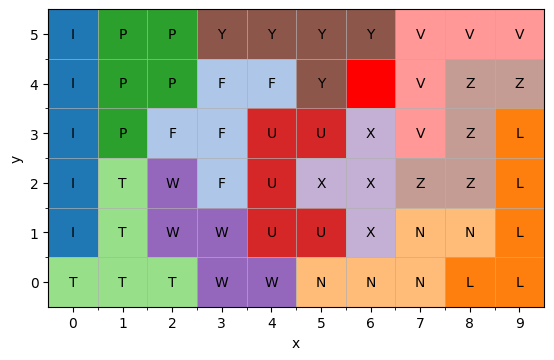


--- Historial de Aptitud ---


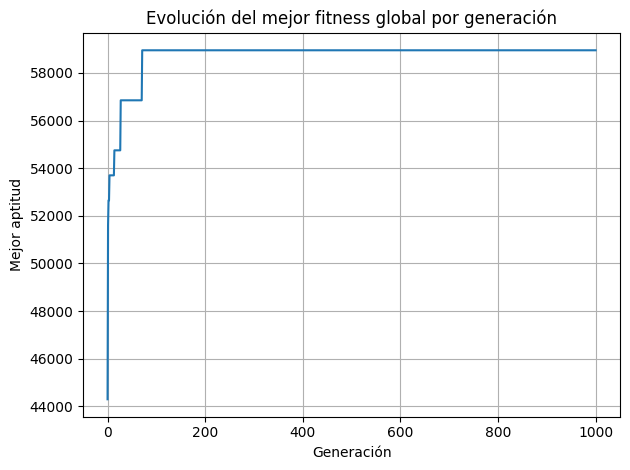

In [ ]:
tot_fitness = []

mejor, fitn = ag()

print(f"Mejor aptitud encontrada: {fitn}")
print("\n--- Configuración Decodificada ---")
mostrar_config_legible(mejor)

print("\n--- Tablero Asociado ---")
mostrar_solucion_matplotlib(mejor)

print("\n--- Historial de Aptitud ---")
plot_history(tot_fitness)